In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
%run beautify_plots.py

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import neural_net_helper
%aimport neural_net_helper

nnh = neural_net_helper.NN_Helper()

# Learning rate schedules

In addition to smarter optimizers, we can control learning rates by changing them across epochs of
training.

This is very much of an art rather than a science.

We give a brief overview.

## Warm up
[Bag of Tricks for Image Classification using CNNs](https://arxiv.org/abs/1812.01187)

- When training starts: initial values of $\W$ far optimal values
- At this point, losses (and gradients) are probably large
    - large updates to $\W$ might cause instability

So, we can start off "slow" with a low initial rate during a *warm-up period*.
- low learning rate compensates for high gradient

Post the warm-up, we can use a higher rate to speed training.

## Post warm-up

Typical strategy has been to decrease learning rate as the number of epochs increase.

Idea is to take smaller steps as we approach the region of optimality
- don't want to overshoot

There are many ways to set a learning rate schedule (a function that maps epoch number to a rate)

- step schedule
    - vary rate by epoch
    - rate decreases as epoch increases
- cosine decay
    - decrease rate according to a cosine function
        - $\text{learning_rate}_{t} = {1\over{2}} \left( 1 + \cos(  \pi{{t}\over{T}} ) \right)  * \text{learning_rate}_{0} $
            - where $\text{learning_rate}_{0}$ is initial learning rate, $T$ is number of batches
        - slow decrease in rate at start
        - near-linear decrease in middle
        - slow decrease near end

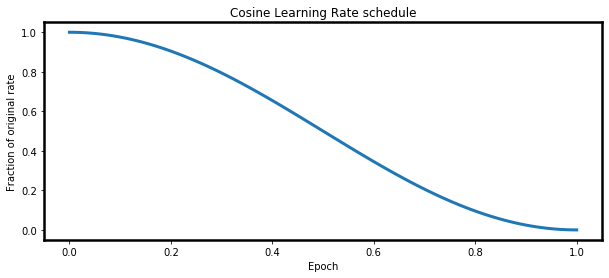

In [5]:
_= nnh.plot_cosine_lr()

# Regularization

The ultimate goal of Machine Learning is out of sample prediction.

Because Neural Networks often learn a large number of parameters (weights), overfitting is a concern.

We will briefly review several methods to combat overfitting

## Loss function: add regularization penalty

The same methods that were applicable in Classical Machine Learning apply to Deep Learning as well.

These include regularization penalties that aim to reduce the number of parameters.
- L2 regularization
- L1 regularization

## Dropout

[Droput paper](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Overfitting can occur because some weights in the NN adapt so as to memorize "noisy" features.

*Dropout* is a method that *randomly drops a unit in the NN*
- For each training example $\x^\ip$
- Each unit gets dropped with probability $p$
 


<table>
    <tr>
        <th><center>NN, no dropout</center></th>
    </tr>
    <tr>
        <td><img src="images/Dropout_NN_wo_dropout.png"</td>
    </tr>


<table>
    <tr>
        <th><center>NN, 50% dropout</center></th>
    </tr>
    <tr>
        <td><img src="images/Dropout_NN_w_dropout.png"></td>
    </tr>


A Neural Network with $N$ units contains $2^N$ possible sub-networks.

Dropout can be viewed as training many of these sub-networks (with weights shared by sub-networks.)

If a feature is truly important, the NN must adapt to robustly recognize the feature.

If it is not important, the goal is to prevent a unit from memorizing it.

In Keras, Dropout is implemented by a layer:

`Dropout(rate)`

where `rate` is the probability of dropping a unit.

Dropout has been supplanted by Batch Normalization, but is worth studying 
- for its simplicity and ease of use
- inspiration it offers.


## Data Augmentation 

It is sometimes possible to expand the training set in such a way as to discourage overfitting.

This usually involves 
creating variants of training examples
- make it hard to memorize them all.

### Input Transformation

Alter the image while preserving its label.

- Image transformation
    - rotate, crop, flip

### Label smoothing" reducing prediction confidence

[Label Smoothing paper](https://arxiv.org/pdf/1701.06548.pdf)

Recall our discussion about the difference between Cross Entropy and Hinge Loss
- Hinge Loss "stops trying" to improve parameters when they are just "good enough" to yield a correct prediction
- Cross Entropy: tries to improve probablity to exactly $0$ or $1$

Cross Entropy's relentless search for improvement may lead to poor out of sample generalization.

A class of solutions exists to discourage the NN from seeking absolute confidence in its prediction.

*Label Smoothing* changes binary targets to values that are only approximately $0$ or $1$.

| Example | Smoothed label
| :- | -----
| $(\x^\ip, 0)$ | $(\x^\ip, 0 + \epsilon)$
| $(\x^\ip, 1)$ | $(\x^\ip, 1 - \epsilon)$


So rather than using One Hot Encoding (OHE), we use "$\epsilon$ Hot Encoding"

## Mixup training
[Mixup training paper](https://arxiv.org/abs/1905.11001)

*Mixup training* is a second solution to prevent an NN from seeking absolute confidence.

It creates additional training examples that are *mixtures* of existing examples:


| &nbsp; &nbsp; &nbsp; &nbsp; Training example &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;         | Mixup ? 
|:--- | :--- 
| $(\x^\ip, \y^\ip)$ &nbsp; &nbsp; &nbsp;  &nbsp; | original
| $(\x^{(i')}, \y^{(i')})$ &nbsp; &nbsp; &nbsp; | original
| $(\x^\ip + \lambda \x^{(i')}, \y^\ip) + \lambda \y^{(i')})$ | Mixup


The mixing parameter $\lambda$ is best when it is close to $0$ or $1$
- $(0 + \epsilon)$ or $(1 - \epsilon)$.

# Conclusion

Creating multi-layer networks seems simple.

But as with many tasks
- The difference between a design that looks good on paper and one that works well in practice
- Comes down to managing lots of details !

Network design is as much an art as it is a science.

In [6]:
print("Done")

Done
